# Data colletion

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import glob

In [4]:
#ruta a la carpeta
folder = "/content/drive/MyDrive/Github/sp-500/individual_stocks_5yr"

#obtener lista
csv_files = glob.glob(folder + '/*.csv')

for idx, file in enumerate(csv_files):
  print(f'{idx}: {file}')

0: /content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/AGN_data.csv
1: /content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/ALK_data.csv
2: /content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/AAPL_data.csv
3: /content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/ALGN_data.csv
4: /content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/ADM_data.csv
5: /content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/ABC_data.csv
6: /content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/ADI_data.csv
7: /content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/AEP_data.csv
8: /content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/ACN_data.csv
9: /content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/AAP_data.csv
10: /content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/ABT_data.csv
11: /content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/AES_data.csv
12: /content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/ALL_data.csv
13: /content/drive/M

In [5]:
company_list = [
    "/content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/AAPL_data.csv",
    "/content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/AMZN_data.csv",
    "/content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/GOOGL_data.csv",
    "/content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/MSFT_data.csv"
]


In [6]:
all_data = pd.DataFrame()

for file in company_list:
    current_df = pd.read_csv(file)
    all_data = pd.concat([all_data, current_df], ignore_index=True) #en algunas versiones es valido usar append


In [7]:
all_data.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [8]:
all_data.shape

(5036, 7)

In [9]:
all_data["Name"].unique()

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

# what was the change in price of the stock overtime?

In [10]:
all_data.isnull().sum()

,0
date,0
open,0
high,0
low,0
close,0
volume,0
Name,0


In [11]:
all_data.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object


In [12]:
all_data["date"] = pd.to_datetime(all_data["date"])

In [13]:
all_data["date"]

,date
0,2013-02-08
1,2013-02-11
2,2013-02-12
3,2013-02-13
4,2013-02-14
...,...
5031,2018-02-01
5032,2018-02-02
5033,2018-02-05
5034,2018-02-06


In [14]:
tech_list = all_data["Name"].unique()

In [15]:
tech_list

array(['AAPL', 'AMZN', 'GOOGL', 'MSFT'], dtype=object)

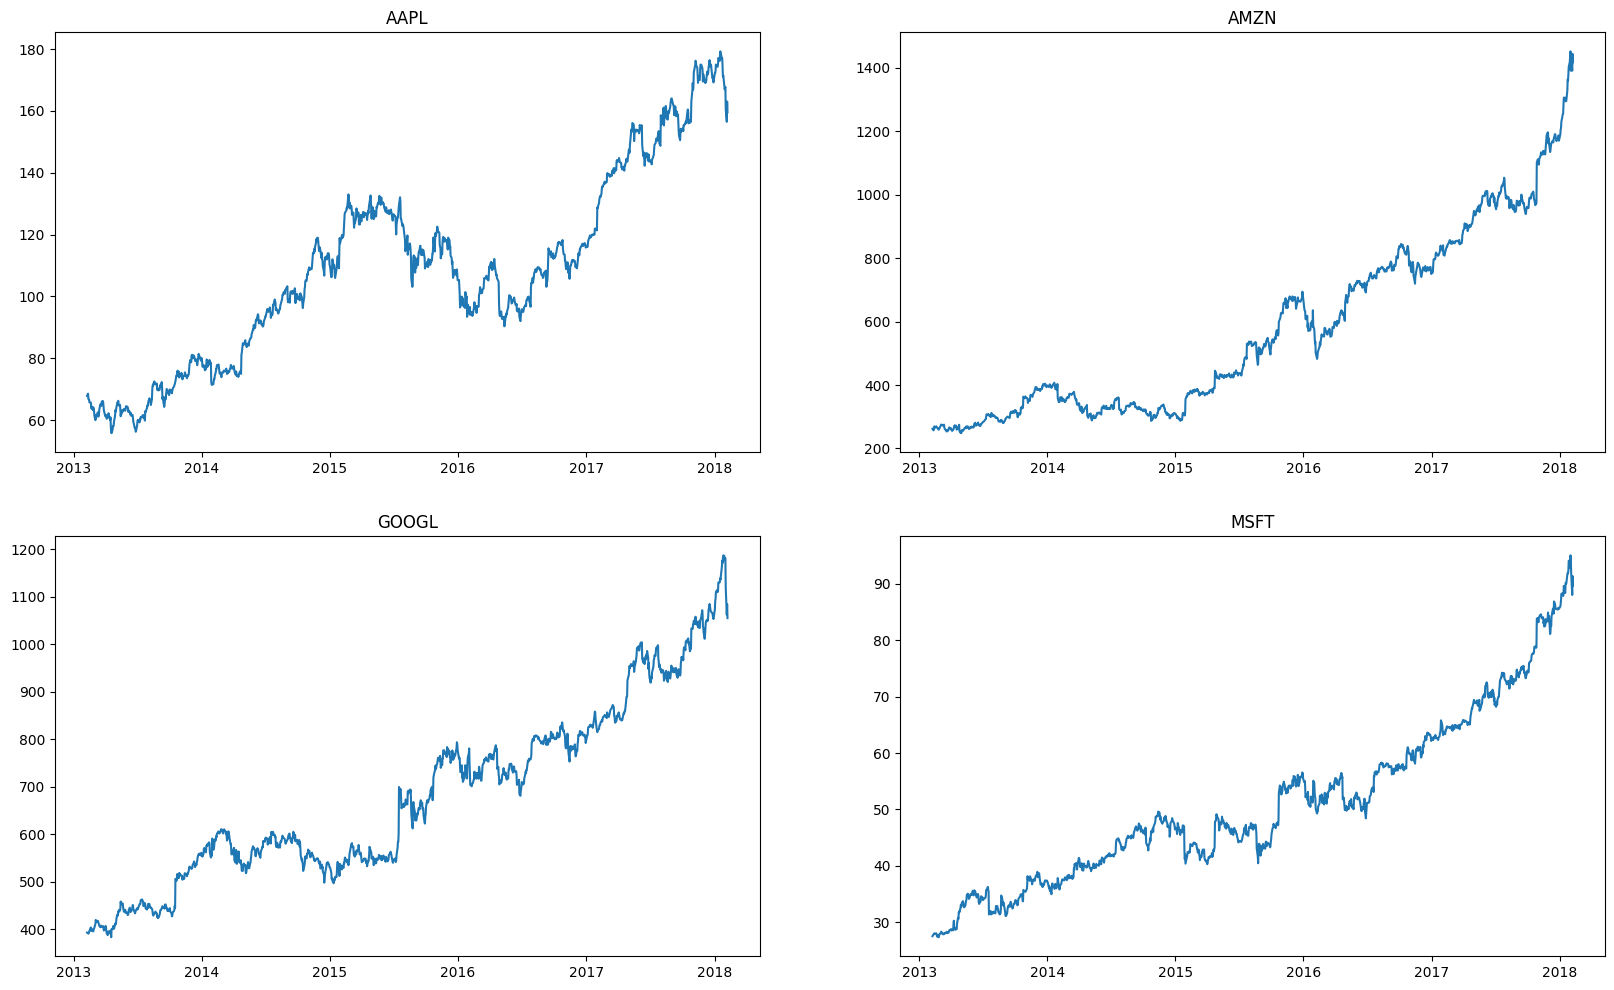

In [16]:
plt.figure(figsize=(20,12))

for index , company in enumerate(tech_list, 1):
  plt.subplot(2,2, index)
  filter_1 = all_data["Name"] == company
  df = all_data[filter_1]
  plt.plot(df["date"], df["close"])
  plt.title(company)

# What was the moving average of the various stocks?

In [17]:
all_data.head(15)

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL
5,2013-02-15,66.9785,67.1656,65.7028,65.7371,97924631,AAPL
6,2013-02-19,65.8714,66.1042,64.8356,65.7128,108854046,AAPL
7,2013-02-20,65.3842,65.3842,64.1142,64.1214,118891367,AAPL
8,2013-02-21,63.7142,64.1671,63.2599,63.7228,111596821,AAPL
9,2013-02-22,64.1785,64.5142,63.7999,64.4014,82583823,AAPL


In [18]:
all_data["close"].rolling(window=10).mean()

,close
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
5031,92.765
5032,92.943
5033,92.582
5034,92.525


In [19]:
new_data = all_data.copy()

In [20]:
ma_day = [10,20,50]

for ma in ma_day:
  new_data["close_" + str(ma)] = new_data["close"].rolling(window=ma).mean()


In [21]:
new_data

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN,NaN,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,NaN,NaN,NaN
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,NaN,NaN,NaN
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,NaN,NaN,NaN
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
5031,2018-02-01,94.7900,96.0700,93.5813,94.2600,47227882,MSFT,92.765,90.6770,86.9978
5032,2018-02-02,93.6400,93.9700,91.5000,91.7800,47867753,MSFT,92.943,90.9105,87.1828
5033,2018-02-05,90.5600,93.2400,88.0000,88.0000,51031465,MSFT,92.582,90.9010,87.2684
5034,2018-02-06,86.8900,91.4750,85.2500,91.3300,67998564,MSFT,92.525,91.0535,87.4328


In [22]:
new_data.tail(7)

,date,open,high,low,close,volume,Name,close_10,close_20,close_50
5029,2018-01-30,93.30,93.660,92.1000,92.74,38635053,MSFT,91.862,89.8285,86.5244
5030,2018-01-31,93.75,95.400,93.5100,95.01,48756338,MSFT,92.349,90.2815,86.7606
5031,2018-02-01,94.79,96.070,93.5813,94.26,47227882,MSFT,92.765,90.6770,86.9978
5032,2018-02-02,93.64,93.970,91.5000,91.78,47867753,MSFT,92.943,90.9105,87.1828
5033,2018-02-05,90.56,93.240,88.0000,88.00,51031465,MSFT,92.582,90.9010,87.2684
5034,2018-02-06,86.89,91.475,85.2500,91.33,67998564,MSFT,92.525,91.0535,87.4328
5035,2018-02-07,90.49,91.770,89.2000,89.61,41107592,MSFT,92.304,91.1230,87.5598


In [23]:
new_data.set_index("date", inplace=True)

In [24]:
new_data.columns

Index(['open', 'high', 'low', 'close', 'volume', 'Name', 'close_10',
       'close_20', 'close_50'],
      dtype='object')

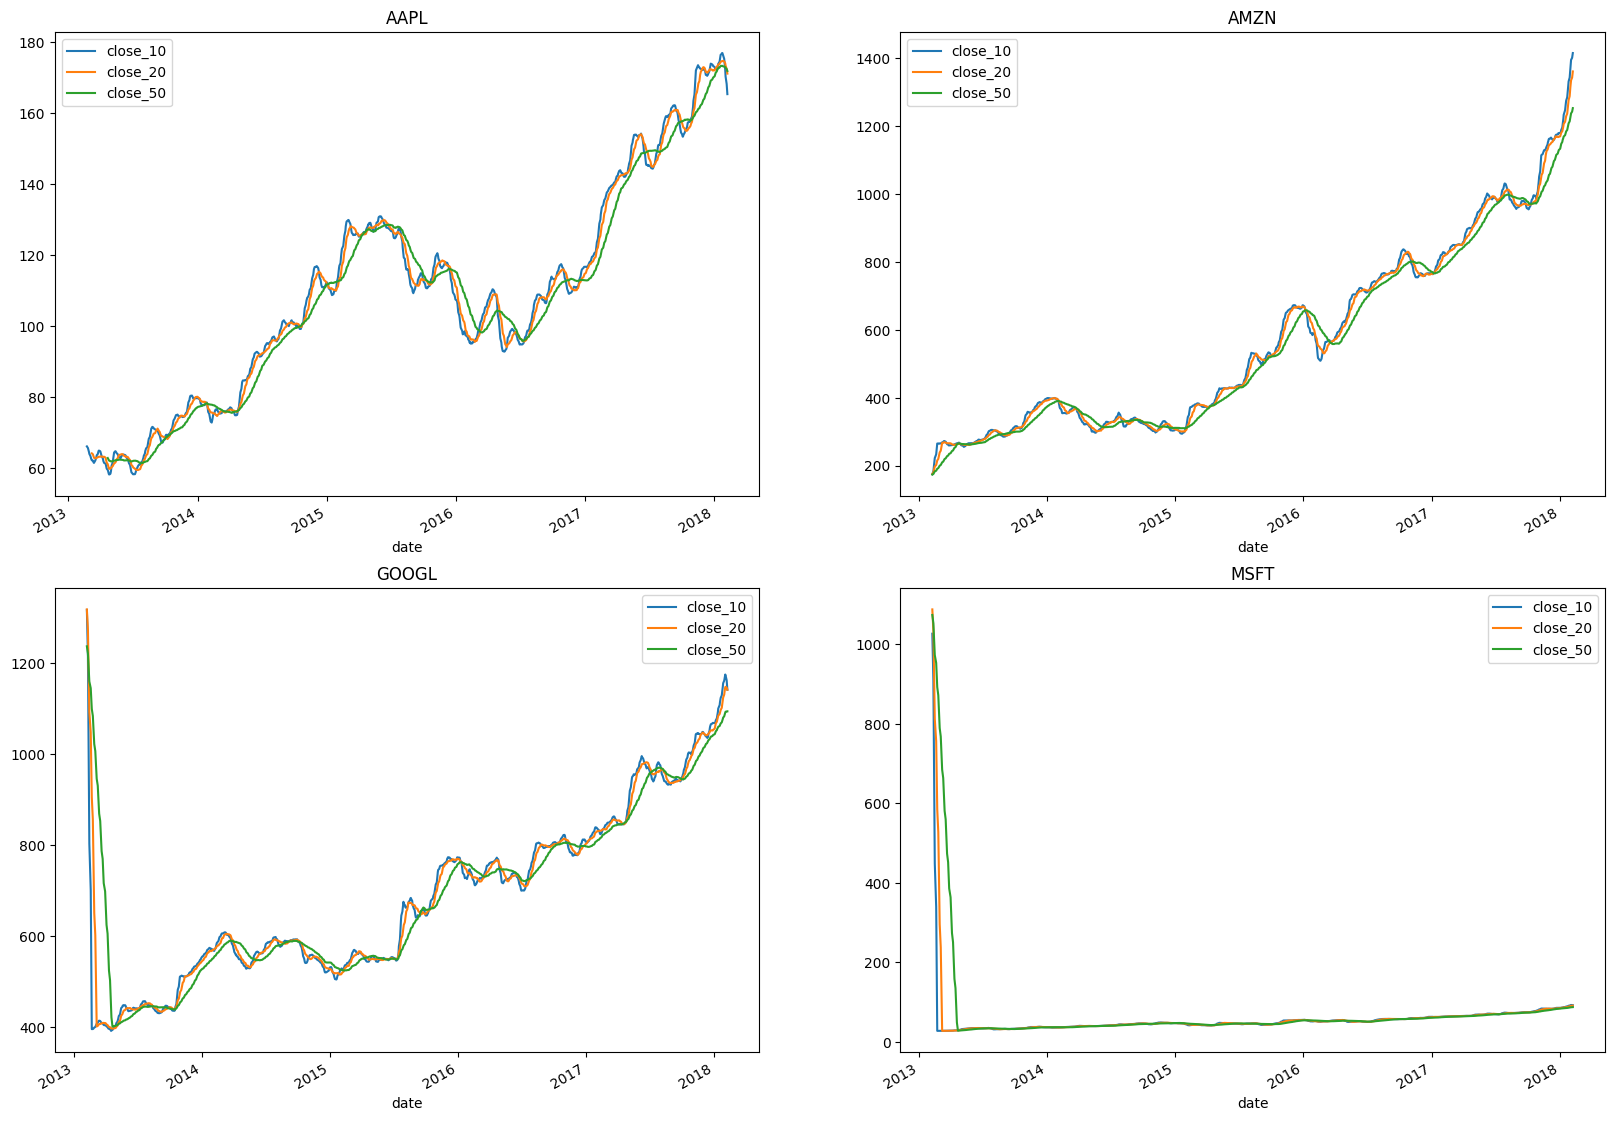

In [25]:
plt.figure(figsize=(20, 15))

for index, company in enumerate(tech_list, 1):
    plt.subplot(2, 2, index)
    filter_1 = new_data["Name"] == company
    df = new_data[filter_1]
    df[['close_10', 'close_20', 'close_50']].plot(ax=plt.gca())
    plt.title(company)


# Analyse Closing price change in apple stock

In [26]:
company_list

['/content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/AAPL_data.csv',
 '/content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/AMZN_data.csv',
 '/content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/GOOGL_data.csv',
 '/content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/MSFT_data.csv']

In [27]:
apple = pd.read_csv(company_list[0])

In [28]:
apple.head()

,date,open,high,low,close,volume,Name
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL
4,2013-02-14,66.3599,67.3771,66.2885,66.6556,88809154,AAPL


In [29]:
apple["daily return (in %)"]= apple['close'].pct_change()*100

In [30]:
apple.head(4)

,date,open,high,low,close,volume,Name,daily return (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [31]:
import plotly.express as px

In [32]:
px.line(apple, x = "date", y = "daily return (in %)")

# Performing resampling analysis of closing price

In [33]:
apple.dtypes

,0
date,object
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object
daily return (in %),float64


In [34]:
apple["date"] = pd.to_datetime(apple["date"])

In [35]:
apple.dtypes

,0
date,datetime64[ns]
open,float64
high,float64
low,float64
close,float64
volume,int64
Name,object
daily return (in %),float64


In [36]:
apple.head(4)

,date,open,high,low,close,volume,Name,daily return (in %)
0,2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
1,2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2,2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
3,2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [37]:
apple.set_index("date", inplace=True)

In [38]:
apple.head(4)

,open,high,low,close,volume,Name,daily return (in %)
date,,,,,,,
2013-02-08,67.7142,68.4014,66.8928,67.8542,158168416,AAPL,NaN
2013-02-11,68.0714,69.2771,67.6071,68.5614,129029425,AAPL,1.042235
2013-02-12,68.5014,68.9114,66.8205,66.8428,151829363,AAPL,-2.506658
2013-02-13,66.7442,67.6628,66.1742,66.7156,118721995,AAPL,-0.190297


In [39]:
apple["close"].resample("ME").mean()

,close
date,
2013-02-28,65.306264
2013-03-31,63.120110
2013-04-30,59.966432
2013-05-31,63.778927
2013-06-30,60.791120
...,...
2017-10-31,157.817273
2017-11-30,172.406190
2017-12-31,171.891500


<Axes: xlabel='date'>

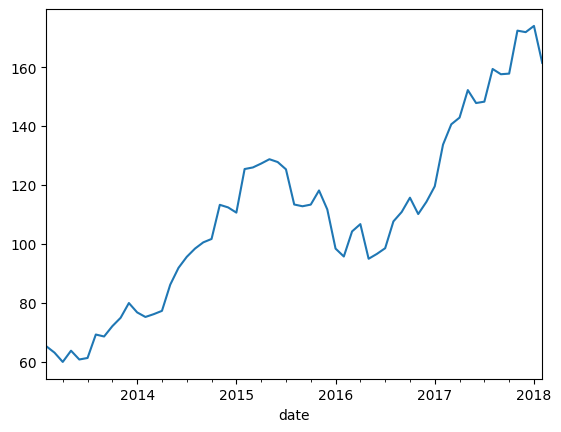

In [40]:
apple["close"].resample("ME").mean().plot()

In [41]:
apple["close"].resample("YE").mean()

,close
date,
2013-12-31,67.237839
2014-12-31,92.264531
2015-12-31,120.039861
2016-12-31,104.604008
2017-12-31,150.585080
2018-12-31,171.594231


<Axes: xlabel='date'>

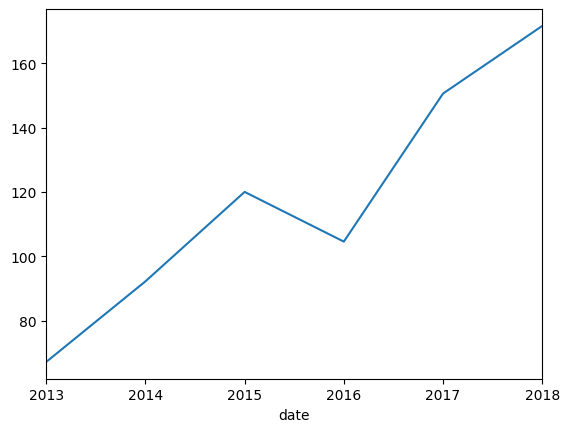

In [42]:
apple["close"].resample("YE").mean().plot()

In [43]:
apple["close"].resample("QE").mean()

,close
date,
2013-03-31,64.020291
2013-06-30,61.534692
2013-09-30,66.320670
2013-12-31,75.567478
2014-03-31,76.086293
2014-06-30,85.117475
2014-09-30,98.163311
2014-12-31,108.821016
2015-03-31,120.776721


<Axes: xlabel='date'>

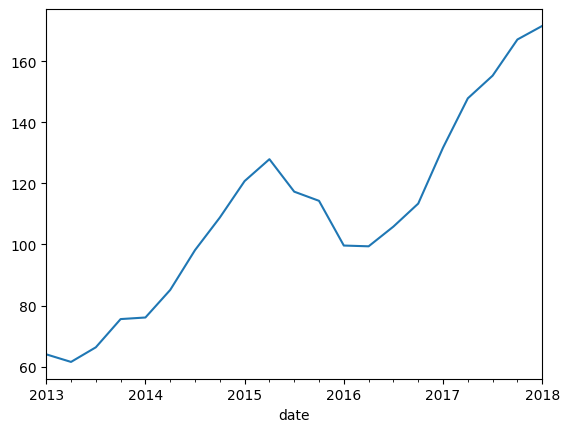

In [44]:
apple["close"].resample("QE").mean().plot()

# checking if the closing prices of these tech companies (amazon, apple, google, microsoft) are correlated or not

In [45]:
company_list

['/content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/AAPL_data.csv',
 '/content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/AMZN_data.csv',
 '/content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/GOOGL_data.csv',
 '/content/drive/MyDrive/Github/sp-500/individual_stocks_5yr/MSFT_data.csv']

In [46]:
app = pd.read_csv(company_list[0])
amzn = pd.read_csv(company_list[1])
google = pd.read_csv(company_list[2])
msft = pd.read_csv(company_list[3])

In [47]:
closing_price = pd.DataFrame()

In [48]:
closing_price["apple_close"] = app["close"]
closing_price["amzn_close"] = amzn["close"]
closing_price["google_close"] = google["close"]
closing_price["msft_close"] = msft["close"]

In [49]:
closing_price

,apple_close,amzn_close,google_close,msft_close
0,67.8542,261.95,393.0777,27.55
1,68.5614,257.21,391.6012,27.86
2,66.8428,258.70,390.7403,27.88
3,66.7156,269.47,391.8214,28.03
4,66.6556,269.24,394.3039,28.04
...,...,...,...,...
1254,167.7800,1390.00,1181.5900,94.26
1255,160.5000,1429.95,1119.2000,91.78
1256,156.4900,1390.00,1062.3900,88.00
1257,163.0300,1442.84,1084.4300,91.33


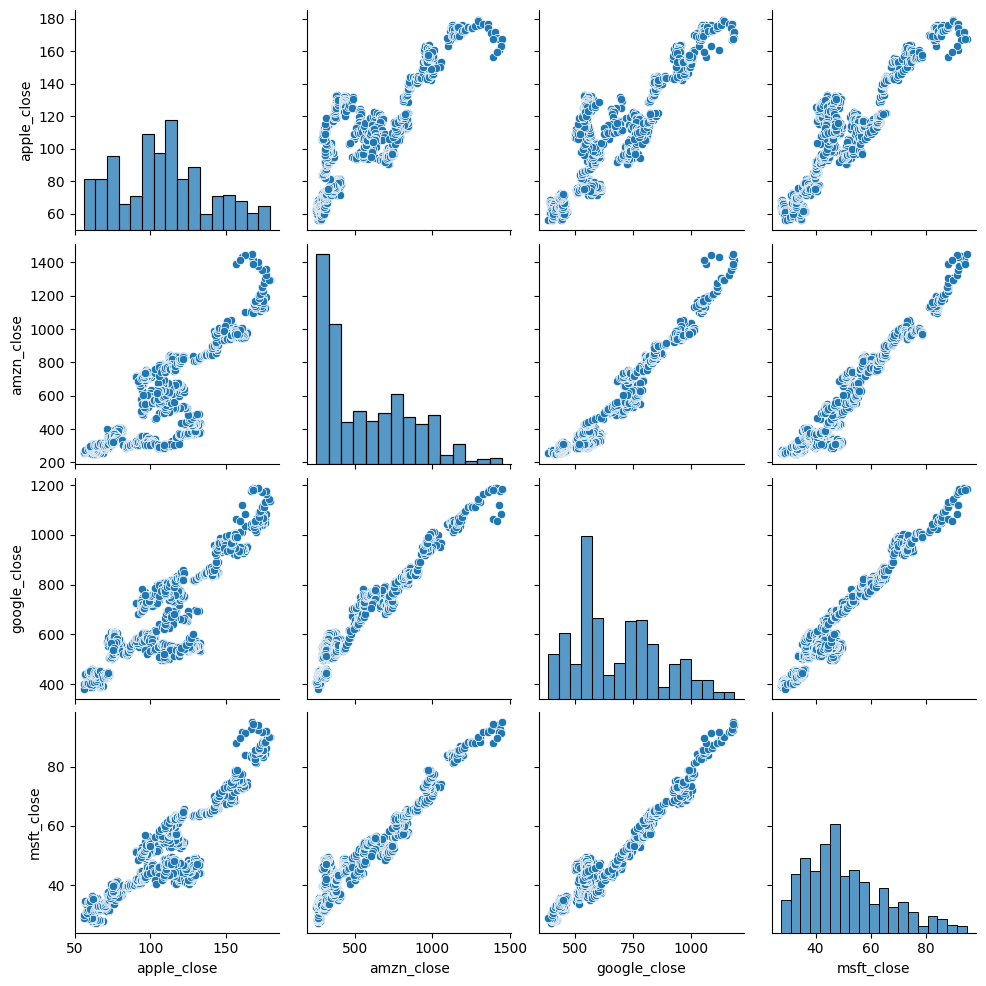

In [50]:
sns.pairplot(closing_price)

In [51]:
closing_price.corr()

,apple_close,amzn_close,google_close,msft_close
apple_close,1.000000,0.819078,0.843736,0.899689
amzn_close,0.819078,1.000000,0.973988,0.955977
google_close,0.843736,0.973988,1.000000,0.970779
msft_close,0.899689,0.955977,0.970779,1.000000


<Axes: >

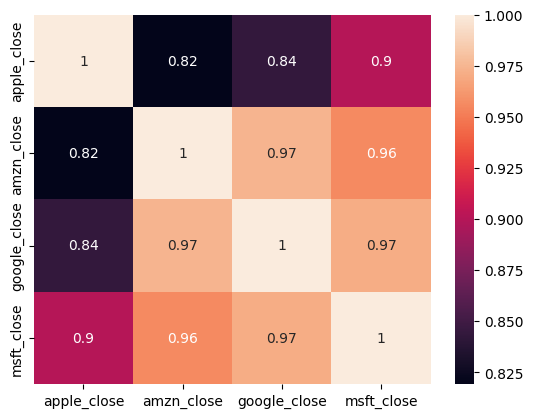

In [52]:
sns.heatmap(closing_price.corr(), annot=True)

# analyse whether daily change in closing price of stocks or not


In [53]:
closing_price["apple_close"]

,apple_close
0,67.8542
1,68.5614
2,66.8428
3,66.7156
4,66.6556
...,...
1254,167.7800
1255,160.5000
1256,156.4900
1257,163.0300


In [54]:
#(closing_price["apple_close"] - closing_price["apple_close"].shift(1)) / closing_price["apple_close"].shift(1) *100

In [55]:
#(closing_price["amzn_close"] - closing_price["amzn_close"].shift(1)) / closing_price["amzn_close"].shift(1) *100

In [56]:
#(closing_price["google_close"] - closing_price["google_close"].shift(1)) / closing_price["google_close"].shift(1) *100

In [57]:
#(closing_price["msft_close"] - closing_price["msft_close"].shift(1)) / closing_price["msft_close"].shift(1) *100

In [58]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'google_close', 'msft_close'], dtype='object')

In [59]:
for col in closing_price.columns:
  closing_price[col + "_pct_change"] = closing_price[col] = (closing_price[col] - closing_price[col].shift(1)) / closing_price[col].shift(1) *100

In [60]:
closing_price

,apple_close,amzn_close,google_close,msft_close,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.042235,-1.809506,-0.375625,1.125227,1.042235,-1.809506,-0.375625,1.125227
2,-2.506658,0.579293,-0.219841,0.071788,-2.506658,0.579293,-0.219841,0.071788
3,-0.190297,4.163123,0.276680,0.538020,-0.190297,4.163123,0.276680,0.538020
4,-0.089934,-0.085353,0.633579,0.035676,-0.089934,-0.085353,0.633579,0.035676
...,...,...,...,...,...,...,...,...
1254,0.209043,-4.196734,-0.053290,-0.789391,0.209043,-4.196734,-0.053290,-0.789391
1255,-4.339015,2.874101,-5.280173,-2.631021,-4.339015,2.874101,-5.280173,-2.631021
1256,-2.498442,-2.793804,-5.075947,-4.118544,-2.498442,-2.793804,-5.075947,-4.118544
1257,4.179181,3.801439,2.074568,3.784091,4.179181,3.801439,2.074568,3.784091


In [61]:
closing_price.columns

Index(['apple_close', 'amzn_close', 'google_close', 'msft_close',
       'apple_close_pct_change', 'amzn_close_pct_change',
       'google_close_pct_change', 'msft_close_pct_change'],
      dtype='object')

In [68]:
clsing_p = closing_price[['apple_close_pct_change', 'amzn_close_pct_change',
       'google_close_pct_change', 'msft_close_pct_change']]

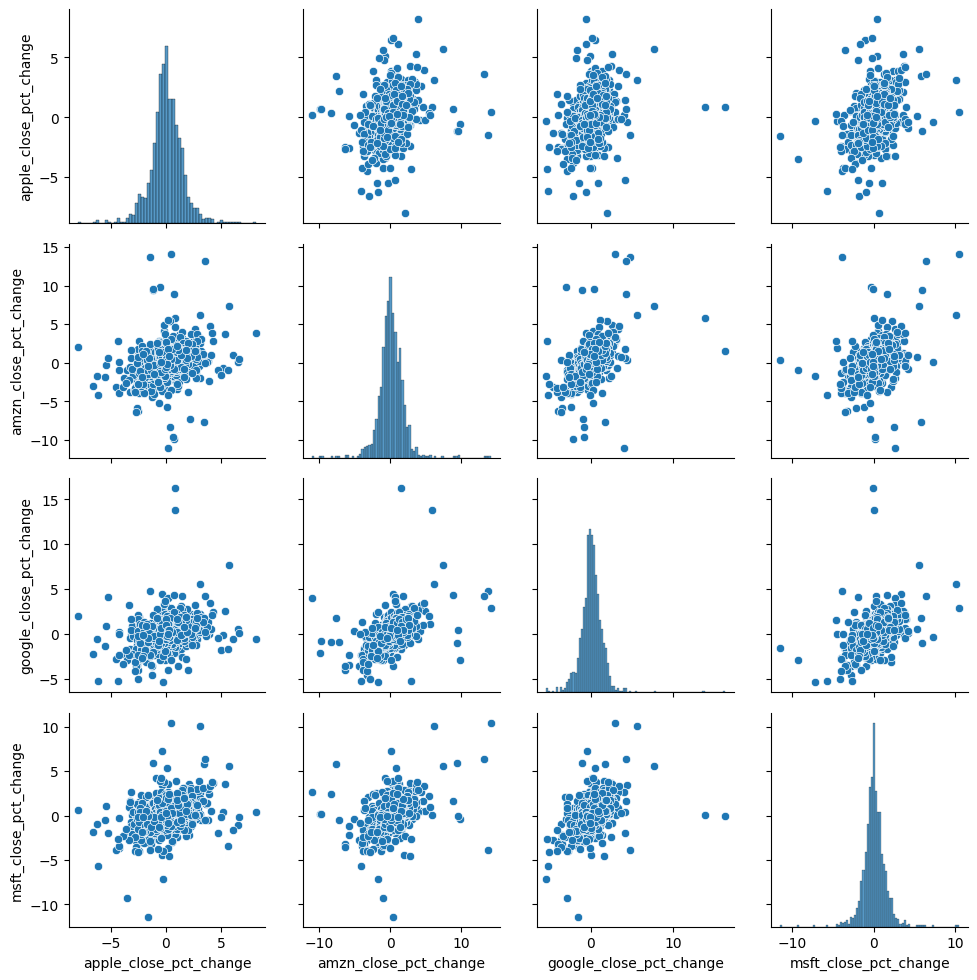

In [70]:
g = sns.PairGrid(data = clsing_p)
g.map_diag(sns.histplot)
g.map_lower(sns.scatterplot)
g.map_upper(sns.scatterplot)

In [75]:
clsing_p.corr()

,apple_close_pct_change,amzn_close_pct_change,google_close_pct_change,msft_close_pct_change
apple_close_pct_change,1.000000,0.287659,0.348858,0.366598
amzn_close_pct_change,0.287659,1.000000,0.548423,0.402678
google_close_pct_change,0.348858,0.548423,1.000000,0.488373
msft_close_pct_change,0.366598,0.402678,0.488373,1.000000


<Axes: >

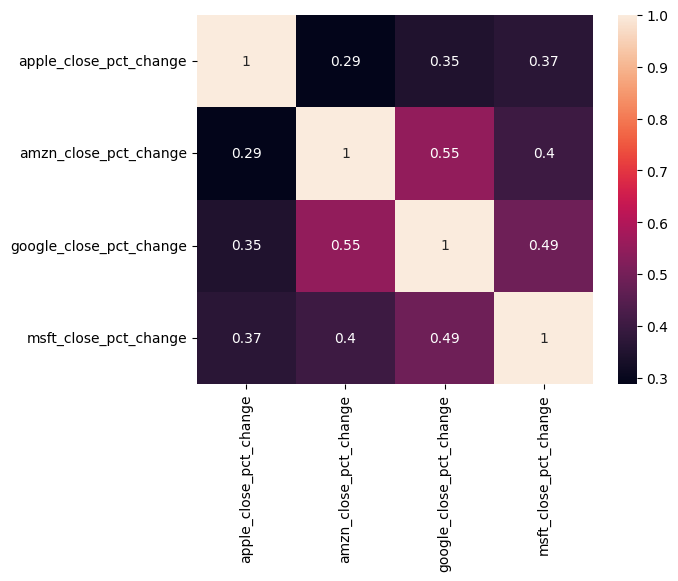

In [78]:
sns.heatmap(clsing_p.corr(), annot=True)